In [47]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, roc_curve
import warnings
warnings.filterwarnings('ignore')

# Cell 2: Load Data
import pandas as pd

# Direct link to the exact same dataset (WA_Fn-UseC_-Telco-Customer-Churn.csv)
url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"

df = pd.read_csv(url)

# Check if it worked
print(df.shape)  # Should show (7043, 21)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [48]:
# Cell 3: Data Preprocessing and Cleaning
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop missing values (only 11 rows)
df.dropna(inplace=True)

# Drop customerID (not useful)
df.drop('customerID', axis=1, inplace=True)

# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    if col != 'Churn':  # Churn will be target
        df[col] = le.fit_transform(df[col])

# Encode target: Yes=1, No=0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   int64  
 7   InternetService   7032 non-null   int64  
 8   OnlineSecurity    7032 non-null   int64  
 9   OnlineBackup      7032 non-null   int64  
 10  DeviceProtection  7032 non-null   int64  
 11  TechSupport       7032 non-null   int64  
 12  StreamingTV       7032 non-null   int64  
 13  StreamingMovies   7032 non-null   int64  
 14  Contract          7032 non-null   int64  
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   int64  
 17  

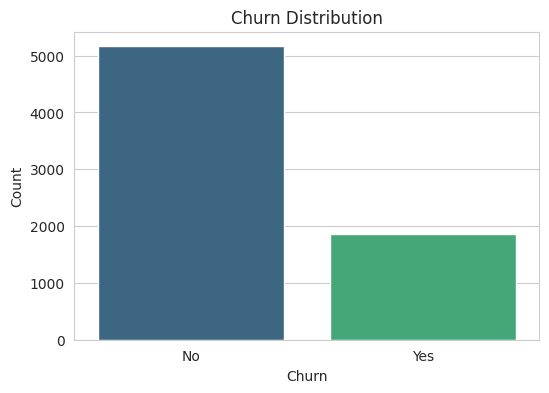

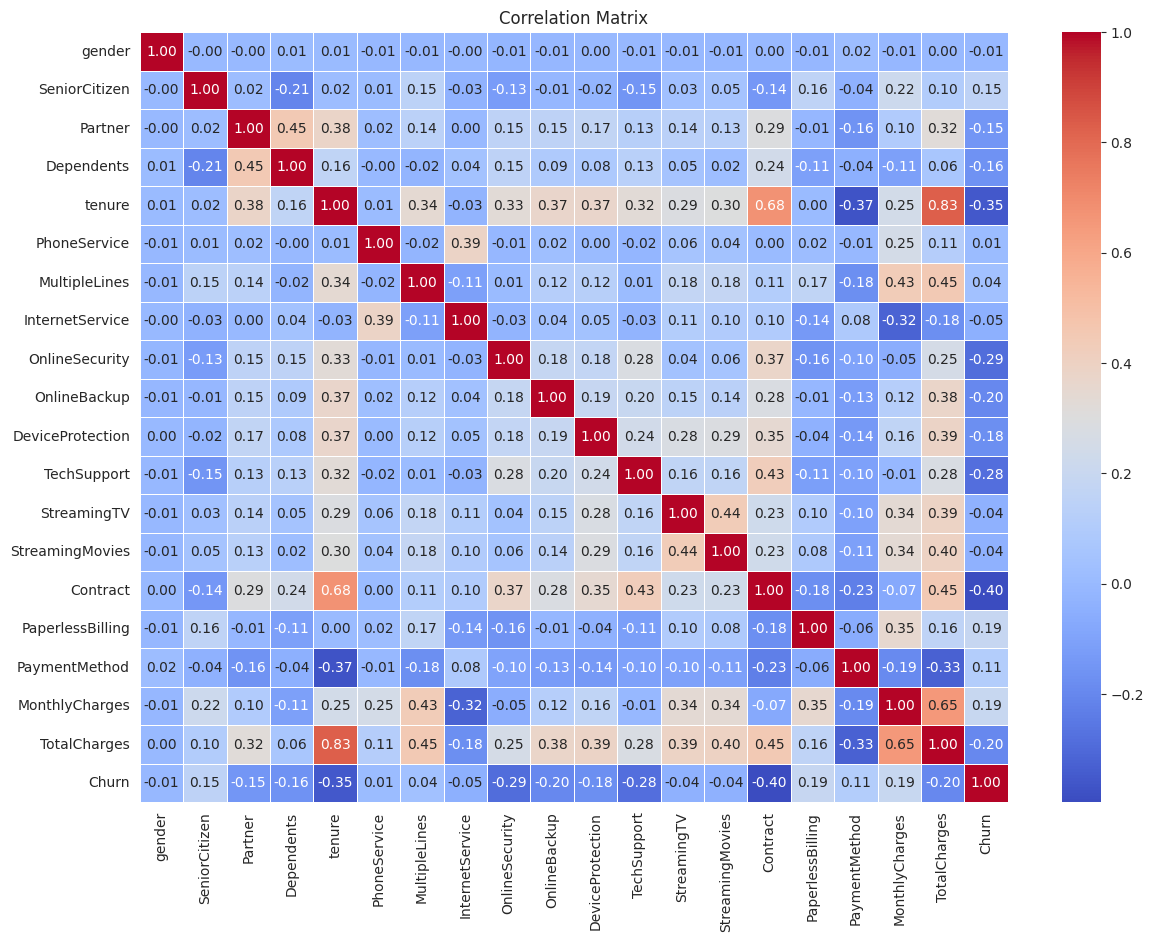

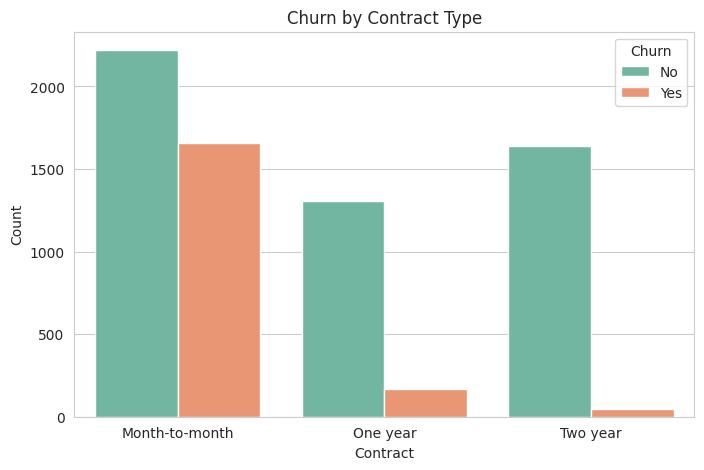

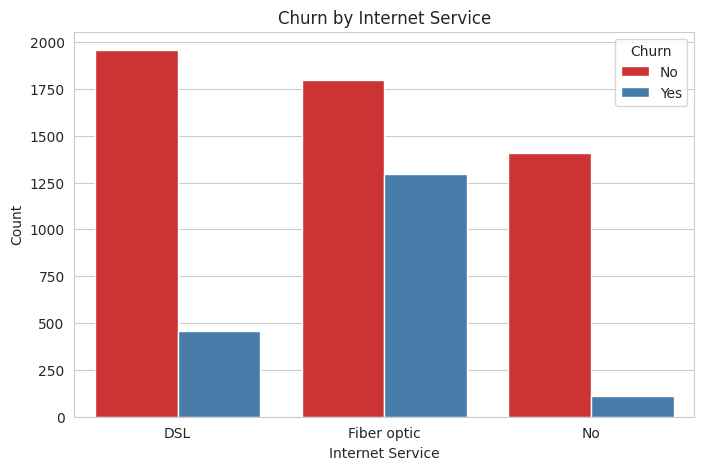

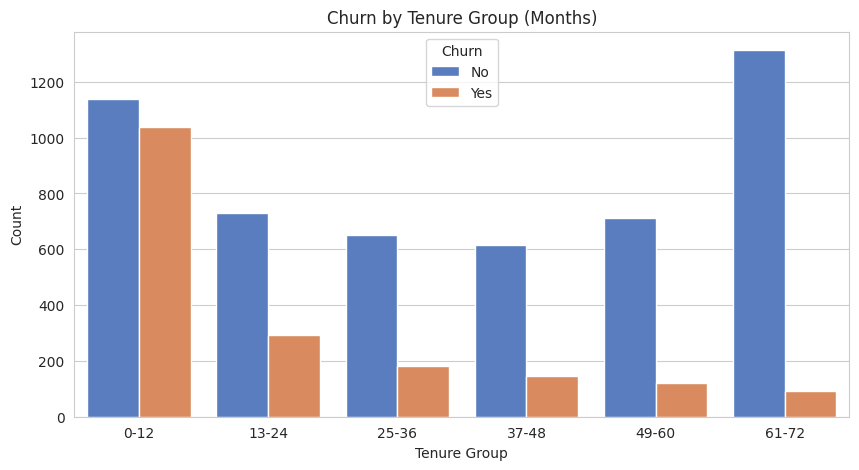

In [57]:
# Cell 4: Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Reload the original dataset for readable category labels in plots
original_url = "https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv"
# Alternative if needed: "https://raw.githubusercontent.com/treselle-systems/customer_churn_analysis/master/WA_Fn-UseC_-Telco-Customer-Churn.csv"
original_df = pd.read_csv(original_url)

# Fix TotalCharges for consistency (same as in Cell 3)
original_df['TotalCharges'] = pd.to_numeric(original_df['TotalCharges'], errors='coerce')
original_df.dropna(inplace=True)

# 1. Churn Distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=original_df, palette='viridis')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# 2. Correlation Heatmap (using preprocessed numeric df)
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# 3. Churn by Contract Type
plt.figure(figsize=(8,5))
sns.countplot(x='Contract', hue='Churn', data=original_df, palette='Set2')
plt.title('Churn by Contract Type')
plt.xlabel('Contract')
plt.ylabel('Count')
plt.show()

# 4. Churn by Internet Service
plt.figure(figsize=(8,5))
sns.countplot(x='InternetService', hue='Churn', data=original_df, palette='Set1')
plt.title('Churn by Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.show()

# 5. Churn by Tenure (binned for better visualization)
plt.figure(figsize=(10,5))
original_df['tenure_group'] = pd.cut(original_df['tenure'], bins=[0,12,24,36,48,60,72],
                                    labels=['0-12', '13-24', '25-36', '37-48', '49-60', '61-72'])
sns.countplot(x='tenure_group', hue='Churn', data=original_df, palette='muted')
plt.title('Churn by Tenure Group (Months)')
plt.xlabel('Tenure Group')
plt.ylabel('Count')
plt.show()

In [59]:
# Cell 5: Feature Selection and Split
X = df.drop('Churn', axis=1)  # Features
y = df['Churn']               # Target

# Scale only the numerical columns: tenure, MonthlyCharges, TotalCharges
# This helps Logistic Regression perform better
scaler = StandardScaler()
X[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(
    X[['tenure', 'MonthlyCharges', 'TotalCharges']]
)

# Train-test split: 80% train, 20% test, stratified to maintain churn ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Print shapes to confirm
print("Shape of training set:", X_train.shape, y_train.shape)
print("Shape of test set:", X_test.shape, y_test.shape)
print("\nChurn rate in full dataset:", y.mean().round(4))
print("Churn rate in training set:", y_train.mean().round(4))
print("Churn rate in test set:", y_test.mean().round(4))

Shape of training set: (5625, 19) (5625,)
Shape of test set: (1407, 19) (1407,)

Churn rate in full dataset: 0.2658
Churn rate in training set: 0.2658
Churn rate in test set: 0.2658


Logistic Regression Results:

Accuracy: 0.7932
ROC-AUC: 0.8345

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1033
           1       0.62      0.56      0.59       374

    accuracy                           0.79      1407
   macro avg       0.73      0.72      0.73      1407
weighted avg       0.79      0.79      0.79      1407



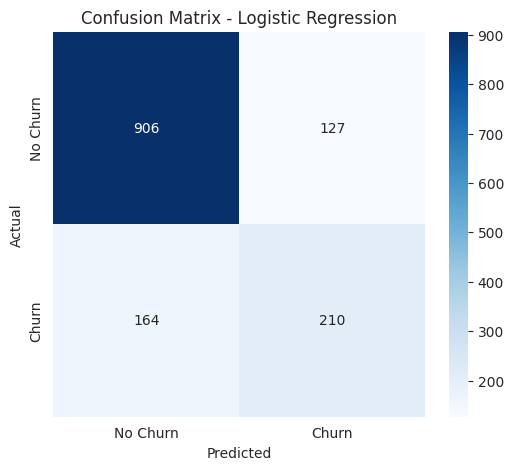

In [61]:
# Cell 6: Model 1 - Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Train Logistic Regression model
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)
y_prob_lr = lr.predict_proba(X_test)[:, 1]  # Probability of churn (class 1)

# Evaluation metrics
print("Logistic Regression Results:\n")
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob_lr):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

# Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Decision Tree Results:

Accuracy: 0.7783

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1033
           1       0.60      0.51      0.55       374

    accuracy                           0.78      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



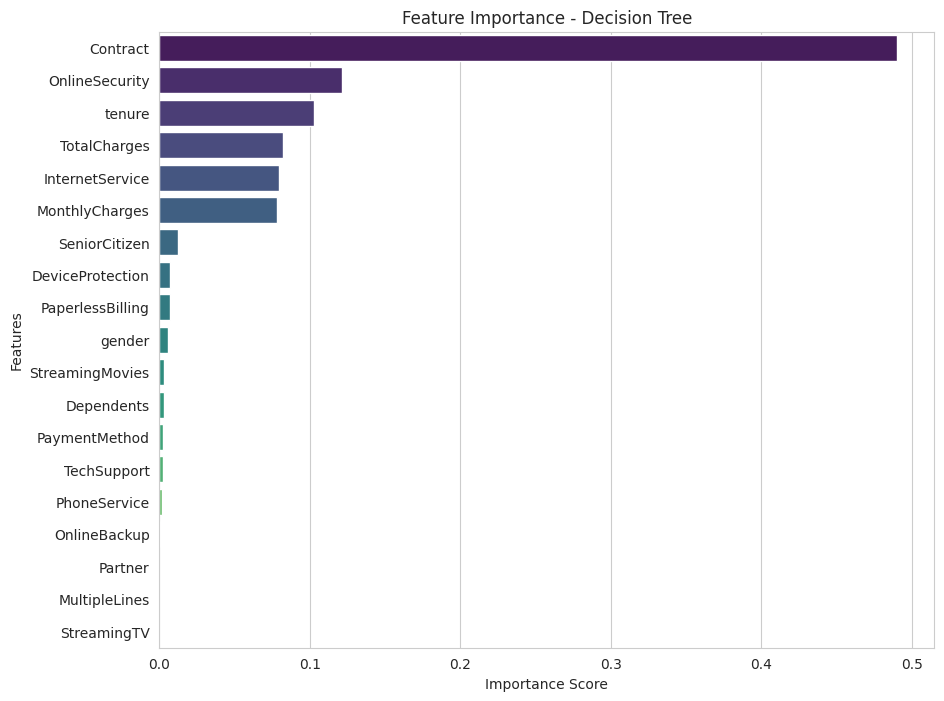


Top 10 Most Important Features:
Contract            0.4904
OnlineSecurity      0.1213
tenure              0.1030
TotalCharges        0.0824
InternetService     0.0796
MonthlyCharges      0.0782
SeniorCitizen       0.0126
DeviceProtection    0.0072
PaperlessBilling    0.0070
gender              0.0057
dtype: float64


In [62]:
# Cell 7: Model 2 - Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Train Decision Tree model
dt = DecisionTreeClassifier(max_depth=6, random_state=42)  # Limited depth to avoid extreme overfitting
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)

# Evaluation metrics
print("Decision Tree Results:\n")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

# Feature Importance
importances = pd.Series(dt.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=importances.values, y=importances.index, palette='viridis')
plt.title('Feature Importance - Decision Tree')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Optional: Print top 10 features with values
print("\nTop 10 Most Important Features:")
print(importances.head(10).round(4))

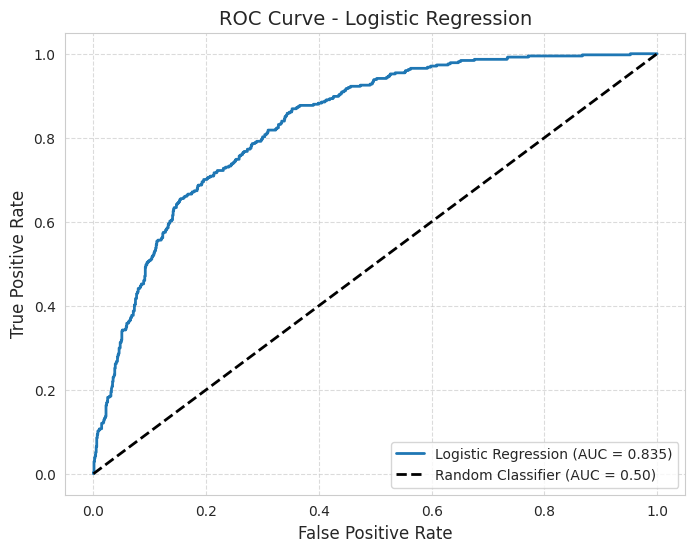

In [64]:
# Cell 8: ROC Curve (for Logistic Regression)
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_prob_lr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linewidth=2, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_prob_lr):.3f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve - Logistic Regression', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.show()